In [5]:
from datascience import *
import matplotlib
path_data = '../../../assets/data/'
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)

# Visualization

Tables are a powerful way of organizing and visualizing data. However, large tables of numbers can be difficult to interpret, no matter how organized they are. Sometimes it is much easier to interpret graphs than numbers.

In this chapter we will develop some of the fundamental graphical methods of data analysis. Our source of data is the [Internet Movie Database](http://www.imdb.com), an online database that contains information about movies, television shows, video games, and so on. The site [Box Office Mojo](http://www.boxofficemojo.com) provides many summaries of IMDB data, some of which we have adapted. We have also used data summaries from [The Numbers](http://www.the-numbers.com), a site with a tagline that says it is "where data and the movie business meet."

<h2>Scatter Plots and Line Graphs</h2>

The table `actors` contains data on Hollywood actors, both male and female. The columns are:

| Column        | Contents |
|---------------------|----------|
|`Actor`              | Name of actor |
|`Total Gross`        | Total gross domestic box office receipt, in millions of dollars, of all of the actor's movies |
| `Number of Movies`  | The number of movies the actor has been in |
| `Average per Movie` | Total gross divided by number of movies |
| `#1 Movie`          | The highest grossing movie the actor has been in |
| `Gross`             | Gross domestic box office receipt, in millions of dollars, of the actor's `#1 Movie` |

In the calculation of the gross receipt, the data tabulators did not include movies where an actor had a cameo role or a speaking role that did not involve much screen time.

The table has 50 rows, corresponding to the 50 top grossing actors. The table is already sorted by `Total Gross`, so it is easy to see that Harrison Ford is the highest grossing actor. At the time when the table was created, his movies had brought in more money at the domestic box office than the movies of any other actor in the table.

In [6]:
actors = Table.read_table(path_data + 'actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


**Terminology.**
A *variable* is a formal name for what we have been calling a "feature" or "attribute", such as 'number of movies.' The term *variable* emphasizes the point that a feature can have different values for different individuals. For example, the numbers of movies that actors have been in vary across all the actors.

Variables that have numerical values and can be measured numerically, such as 'number of movies' or 'average gross receipts per movie' are called *quantitative* or *numerical* variables.

<h2>Scatter Plots</h2>

A *scatter plot* displays the relation between two numerical variables. You saw an example of a scatter plot in an early section where we looked at the number of periods and number of characters in two classic novels.

The Table method `scatter` draws a scatter plot consisting of one point for each row of the table. Its first argument is the label of the column to be plotted on the horizontal axis, and its second argument is the label of the column on the vertical.

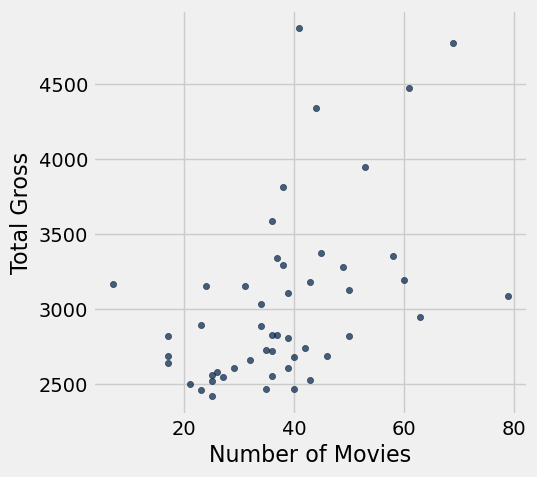

In [7]:
actors.scatter('Number of Movies', 'Total Gross')

The plot contains 50 points, one point for each actor in the table. You can see that it slopes upwards, in general. The more movies an actor has been in, the more the total gross of all of those movies – in general.

Formally, we say that the plot shows an *association* between the variables, and that the association is *positive*: high values of one variable tend to be associated with high values of the other, and low values of one with low values of the other, in general. 

Of course there is some variability. Some actors have high numbers of movies but middling total gross receipts. Others have middling numbers of movies but high receipts. That the association is positive is simply a statement about the broad general trend.

Later in the course we will study how to quantify association. For the moment, we will just think about it qualitatively.

Now that we have explored how the number of movies is related to the *total* gross receipt, let's turn our attention to how it is related to the *average* gross receipt per movie.

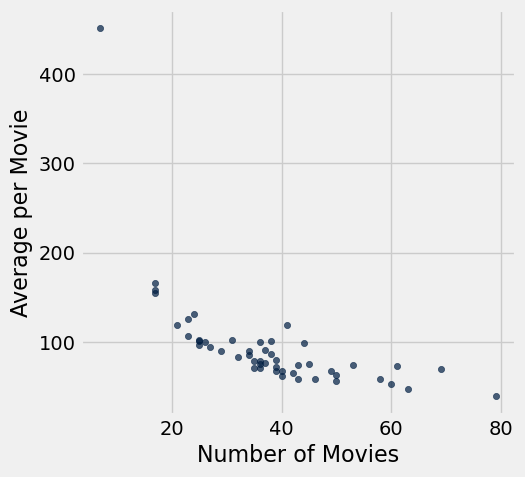

In [8]:
actors.scatter('Number of Movies', 'Average per Movie')

This is a markedly different picture and shows a *negative* association. In general, the more movies an actor has been in, the *less* the average receipt per movie.

Also, one of the points is quite high and off to the left of the plot. It corresponds to one actor who has a low number of movies and high average per movie. This point is an *outlier*. It lies outside the general range of the data. Indeed, it is quite far from all the other points in the plot.

We will examine the negative association further by looking at points at the right and left ends of the plot. 

For the right end, let's zoom in on the main body of the plot by just looking at the portion that doesn't have the outlier.

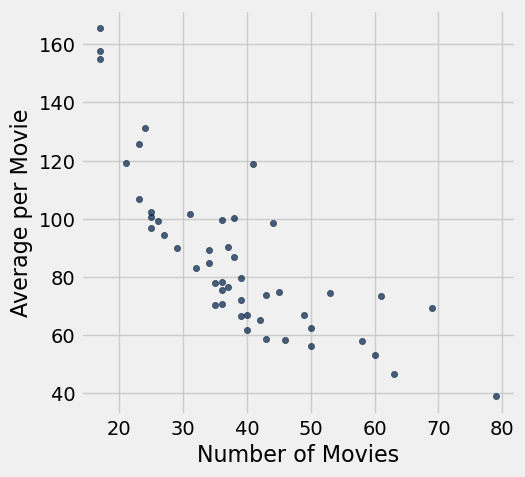

In [9]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

The negative association is still clearly visible. Let's identify the actors corresponding to the points that lie on the right hand side of the plot where the number of movies is large:

In [10]:
actors.where('Number of Movies', are.above(60))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


The great actor Robert DeNiro has the highest number of movies and the lowest average receipt per movie. Other fine actors are at points that are not very far away, but DeNiro's is at the extreme end.

To understand the negative association, note that the more movies an actor is in, the more variable those movies might be, in terms of style, genre, and box office draw. For example, an actor might be in some high-grossing action movies or comedies (such as Meet the Fockers), and also in a large number of smaller films that may be excellent but don't draw large crowds. Thus the actor's value of average receipts per movie might be relatively low.

To approach this argument from a different direction, let us now take a look at the outlier.

In [11]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


As an actor, Anthony Daniels might not have the stature of Robert DeNiro. But his 7 movies had an astonishingly high average receipt of nearly $452$ million dollars per movie.

What were these movies? You might know about the droid C-3PO in Star Wars:

![C-3PO](../../../images/C-3PO_droid.png)

That's [Anthony Daniels](https://en.wikipedia.org/wiki/Anthony_Daniels) inside the metallic suit. He plays C-3PO.

Mr. Daniels' entire filmography (apart from cameos) consists of movies in the high-grossing Star Wars franchise. That explains both his high average receipt and his low number of movies.

Variables such as genre and production budget have an effect on the association between the number of movies and the average receipt per movie. This example is a reminder that studying the association between two variables often involves understanding other related variables as well. 

<h2>Line Plots</h2>

Line plots, sometimes known as line graphs, are among the most common visualizations. They are often used to study chronological trends and patterns.

The table `movies_by_year` contains data on movies produced by U.S. studios in each of the years 1980 through 2015. The columns are:

| **Column** | Content |
|------------|---------|
| `Year` | Year |
| `Total Gross` | Total domestic box office gross, in millions of dollars, of all movies released |
| `Number of Movies` | Number of movies released |
| `#1 Movie` | Highest grossing movie |

In [12]:
movies_by_year = Table.read_table(path_data + 'movies_by_year.csv')
movies_by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


The Table method `plot` produces a line plot. Its two arguments are the same as those for `scatter`: first the column on the horizontal axis, then the column on the vertical. Here is a line plot of the number of movies released each year over the years 1980 through 2015.

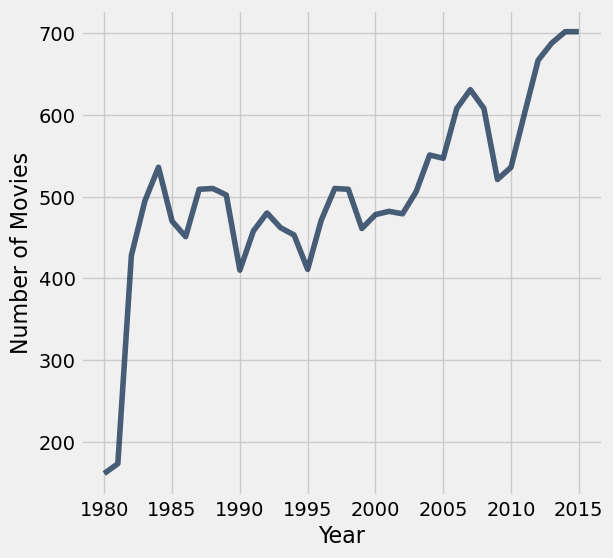

In [13]:
movies_by_year.plot('Year', 'Number of Movies')

The graph rises sharply and then has a gentle upwards trend though the numbers vary noticeably from year to year. The sharp rise in the early 1980's is due in part to studios returning to the forefront of movie production after some years of filmmaker driven movies in the 1970's. 

Our focus will be on more recent years. In keeping with the theme of movies, the table of rows corresponding to the years 2000 through 2015 have been assigned to the name `century_21`.

In [14]:
century_21 = movies_by_year.where('Year', are.above(1999))

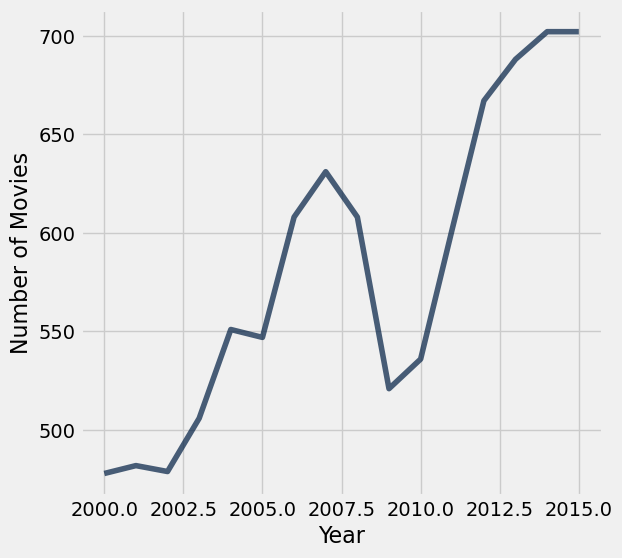

In [15]:
century_21.plot('Year', 'Number of Movies')

The global financial crisis of 2008 has a visible effect – in 2009 there is a sharp drop in the number of movies released.

The dollar figures, however, didn't suffer much.

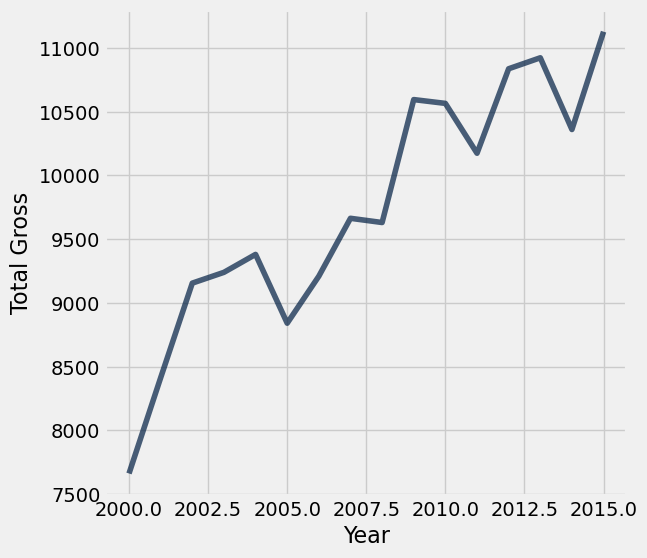

In [16]:
century_21.plot('Year', 'Total Gross')

The total domestic gross receipt was higher in 2009 than in 2008, even though there was a financial crisis and a much smaller number of movies were released.

One reason for this apparent contradiction is that people tend to go to the movies when there is a recession. ["In Downturn, Americans Flock to the Movies,"](http://www.nytimes.com/2009/03/01/movies/01films.html?_r=0) said the New York Times in February 2009. The article quotes Martin Kaplan of the University of Southern California saying, "People want to forget their troubles, and they want to be with other people." When holidays and expensive treats are unaffordable, movies provide welcome entertainment and relief.

In 2009, another reason for high box office receipts was the movie Avatar and its 3D release. Not only was Avatar the \#1 movie of 2009, it is also by some calculations one of the highest grossing movies of all time, as we will see later.

In [17]:
century_21.where('Year', are.equal_to(2009))

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar
